<a href="https://colab.research.google.com/github/helonayala/bab_datasets/blob/main/demo_bab_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# bab_datasets demo

This notebook loads **all datasets**, applies preprocessing, and saves plots for each dataset.


In [27]:
# Colab install from GitHub
# (run once per session)
!pip install -q --upgrade git+https://github.com/helonayala/bab_datasets.git
# !pip install -q git+https://github.com/helonayala/bab_datasets.git

import os
import bab_datasets as nod
import matplotlib.pyplot as plt


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [28]:
# Output folder for figures
fig_dir = "figures"
os.makedirs(fig_dir, exist_ok=True)

print(nod.list_experiments())

['multisine_05', 'multisine_06', 'rampa_negativa', 'rampa_positiva', 'random_steps_01', 'random_steps_02', 'random_steps_03', 'random_steps_04', 'swept_sine']


In [29]:
# Velocity method
velMethod = "central"


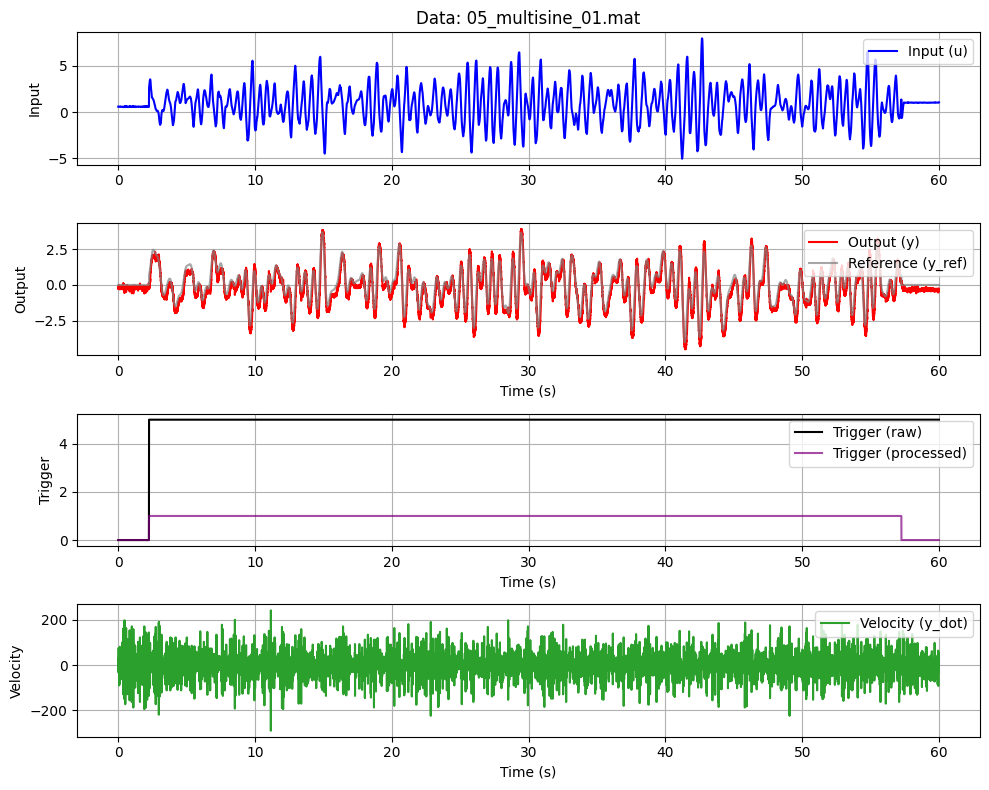

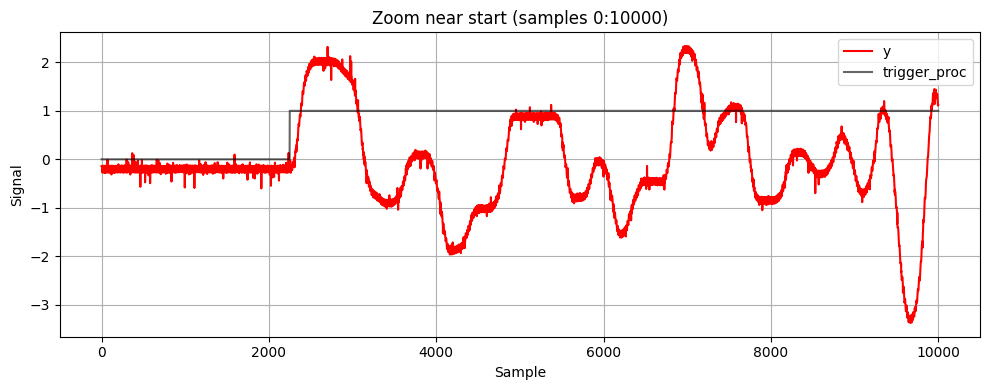

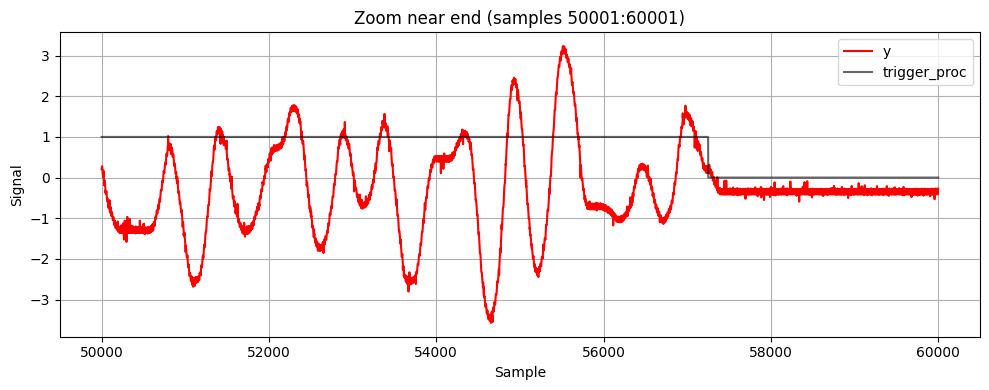

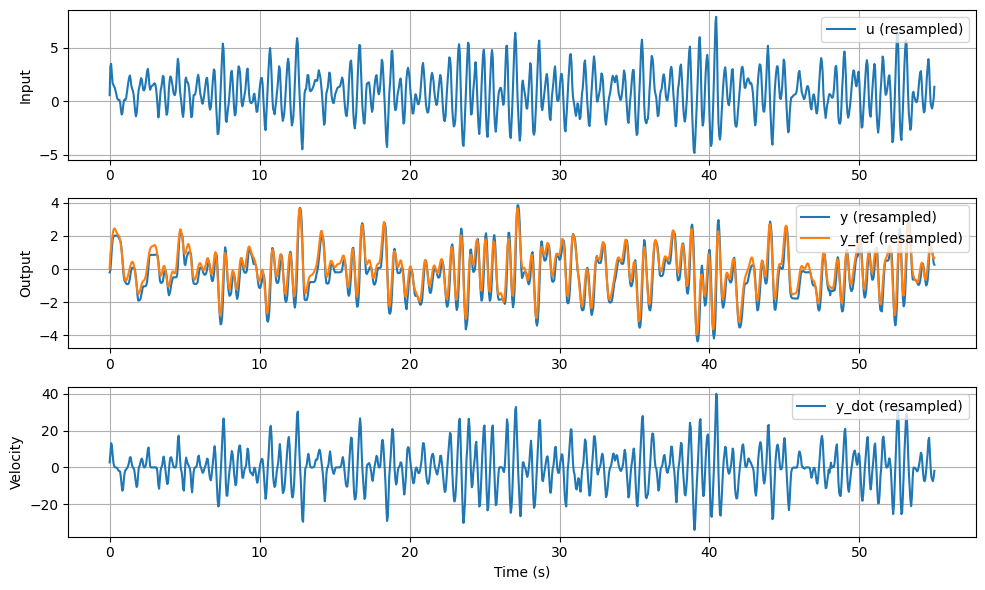

In [30]:
# Load and preprocess 'multisine_05'
data = nod.load_experiment('multisine_05', preprocess=True, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data

In [31]:
# Load and preprocess 'multisine_05' (no pre-processing)
data = nod.load_experiment('multisine_05', preprocess=False, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data

--- Plot for u signal ---


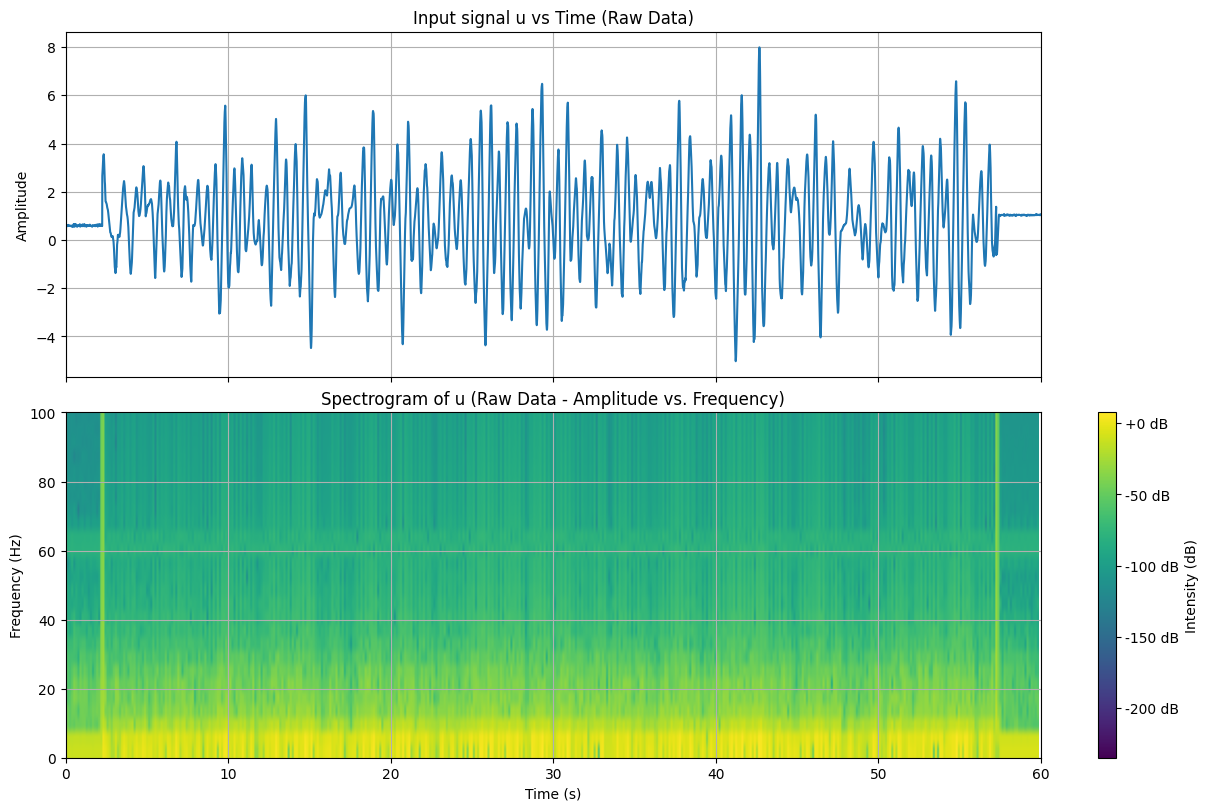

Plot for u saved to figures/u_time_and_spectrogram_raw.png

--- Plot for y signal ---


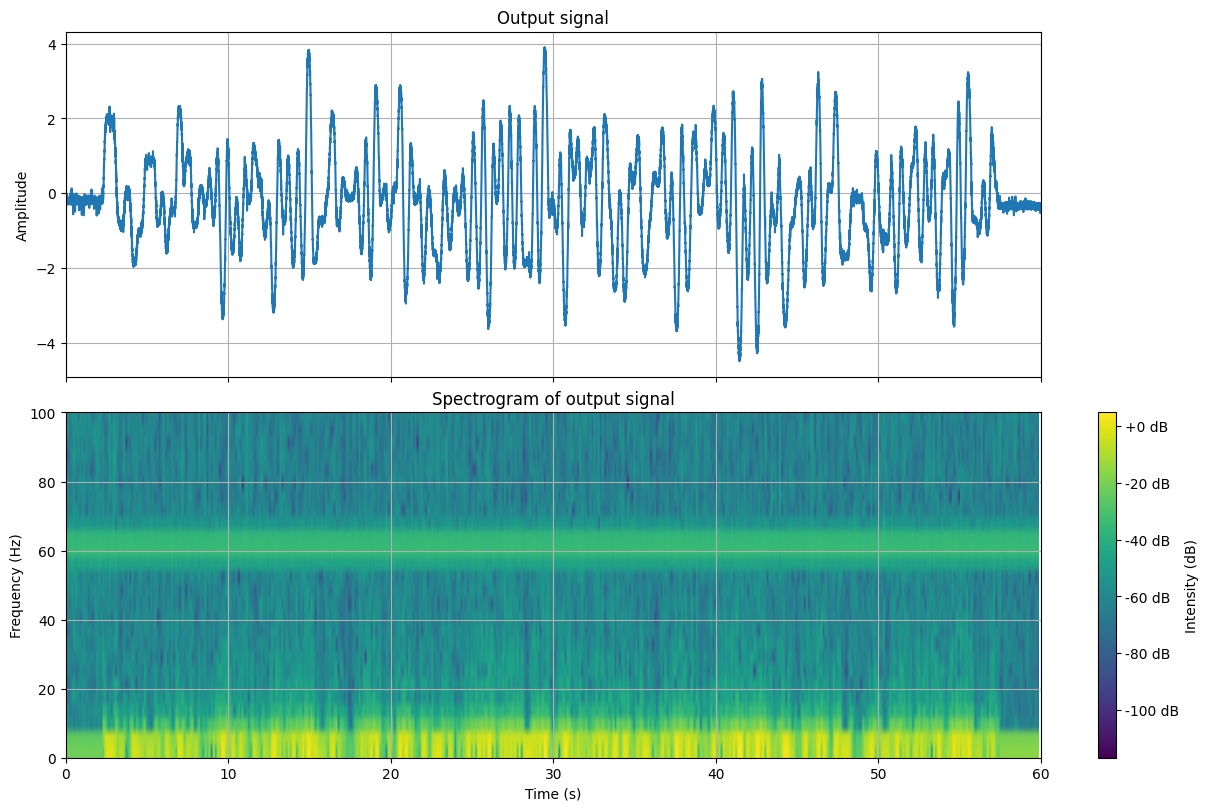

Plot for y saved to figures/y_time_and_spectrogram_raw.png

--- Plot for y_ref signal ---


/usr/local/lib/python3.12/dist-packages/matplotlib/axes/_axes.py:8233: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


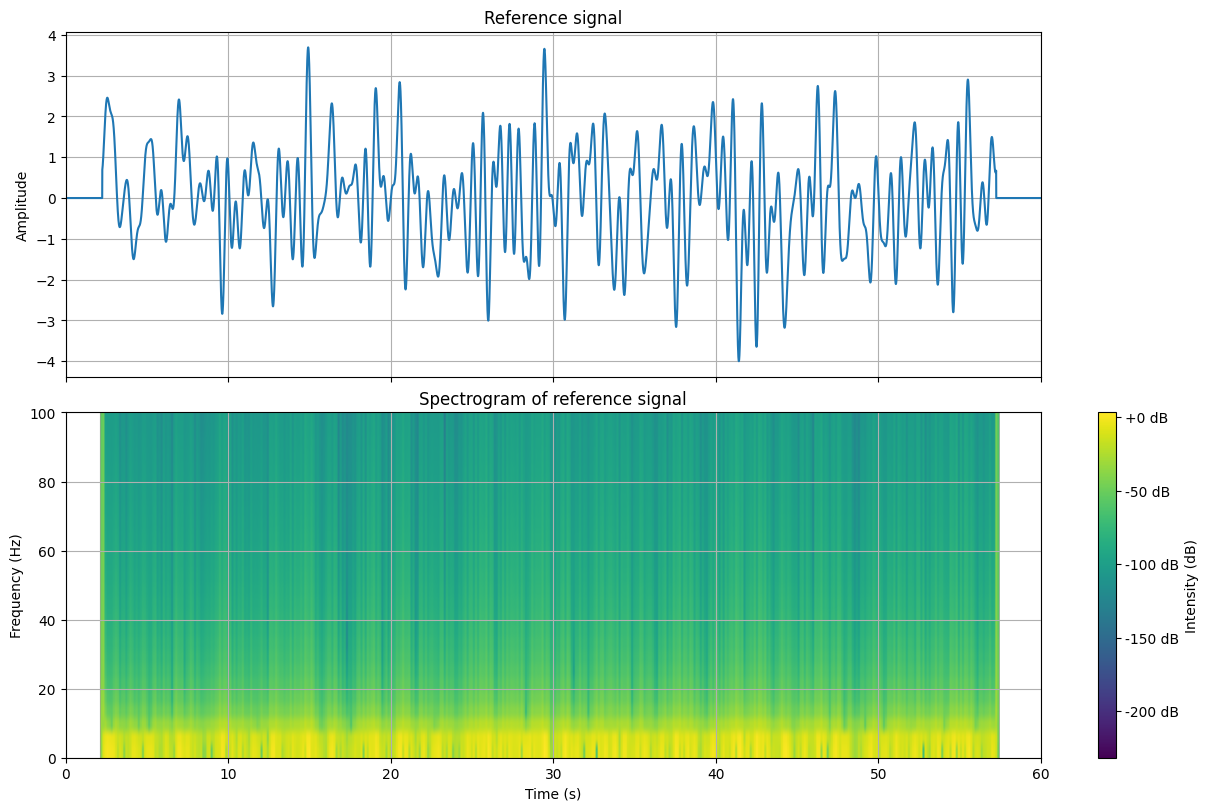

Plot for y_ref saved to figures/y_ref_time_and_spectrogram_raw.png


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Assuming 'u', 'y', and 'y_ref' are already loaded and fs is known
fs = 1000 # From user's previous modification
t = np.arange(len(u)) / fs

# Define a variable for frequency limit
freq_limit = 100 # Hz

# --- Plots for u signal ---
print("--- Plot for u signal ---")
fig_u, axes_u = plt.subplots(2, 1, figsize=(12, 8), sharex=True, constrained_layout=True)

# Plot u vs t
axes_u[0].plot(t, u)
axes_u[0].set_title('Input signal u vs Time (Raw Data)')
axes_u[0].set_ylabel('Amplitude')
axes_u[0].grid(True)

# Plot spectrogram of u
Pxx_u, freqs_u, bins_u, im_u = axes_u[1].specgram(u, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
axes_u[1].set_title('Spectrogram of u (Raw Data - Amplitude vs. Frequency)')
axes_u[1].set_xlabel('Time (s)')
axes_u[1].set_ylabel('Frequency (Hz)')
axes_u[1].set_ylim([0, freq_limit])

# Add colorbar for u's spectrogram
fig_u.colorbar(im_u, ax=axes_u[1], format='%+2.0f dB', label='Intensity (dB)')
axes_u[1].grid(True)

# Explicitly set x-axis limits for u's plots
axes_u[0].set_xlim(t[0], t[-1])

fig_path_u = os.path.join(fig_dir, 'u_time_and_spectrogram_raw.png')
plt.savefig(fig_path_u)
plt.show()
print(f"Plot for u saved to {fig_path_u}")


# --- Plots for y signal ---
print("\n--- Plot for y signal ---")
# 'y' signal also uses the same time vector and sampling frequency
fig_y, axes_y = plt.subplots(2, 1, figsize=(12, 8), sharex=True, constrained_layout=True)

# Plot y vs t
axes_y[0].plot(t, y)
axes_y[0].set_title('Output signal')
axes_y[0].set_ylabel('Amplitude')
axes_y[0].grid(True)

# Plot spectrogram of y
Pxx_y, freqs_y, bins_y, im_y = axes_y[1].specgram(y, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
axes_y[1].set_title('Spectrogram of output signal')
axes_y[1].set_xlabel('Time (s)')
axes_y[1].set_ylabel('Frequency (Hz)')
axes_y[1].set_ylim([0, freq_limit])

# Add colorbar for y's spectrogram
fig_y.colorbar(im_y, ax=axes_y[1], format='%+2.0f dB', label='Intensity (dB)')
axes_y[1].grid(True)

# Explicitly set x-axis limits for y's plots
axes_y[0].set_xlim(t[0], t[-1])

fig_path_y = os.path.join(fig_dir, 'y_time_and_spectrogram_raw.png')
plt.savefig(fig_path_y)
plt.show()
print(f"Plot for y saved to {fig_path_y}")


# --- Plots for y_ref signal ---
print("\n--- Plot for y_ref signal ---")
# 'y_ref' signal also uses the same time vector and sampling frequency
fig_y_ref, axes_y_ref = plt.subplots(2, 1, figsize=(12, 8), sharex=True, constrained_layout=True)

# Plot y_ref vs t
axes_y_ref[0].plot(t, y_ref)
axes_y_ref[0].set_title('Reference signal')
axes_y_ref[0].set_ylabel('Amplitude')
axes_y_ref[0].grid(True)

# Plot spectrogram of y_ref
Pxx_y_ref, freqs_y_ref, bins_y_ref, im_y_ref = axes_y_ref[1].specgram(y_ref, Fs=fs, NFFT=256, noverlap=128, cmap='viridis')
axes_y_ref[1].set_title('Spectrogram of reference signal')
axes_y_ref[1].set_xlabel('Time (s)')
axes_y_ref[1].set_ylabel('Frequency (Hz)')
axes_y_ref[1].set_ylim([0, freq_limit])

# Add colorbar for y_ref's spectrogram
fig_y_ref.colorbar(im_y_ref, ax=axes_y_ref[1], format='%+2.0f dB', label='Intensity (dB)')
axes_y_ref[1].grid(True)

# Explicitly set x-axis limits for y_ref's plots
axes_y_ref[0].set_xlim(t[0], t[-1])

fig_path_y_ref = os.path.join(fig_dir, 'y_ref_time_and_spectrogram_raw.png')
plt.savefig(fig_path_y_ref)
plt.show()
print(f"Plot for y_ref saved to {fig_path_y_ref}")

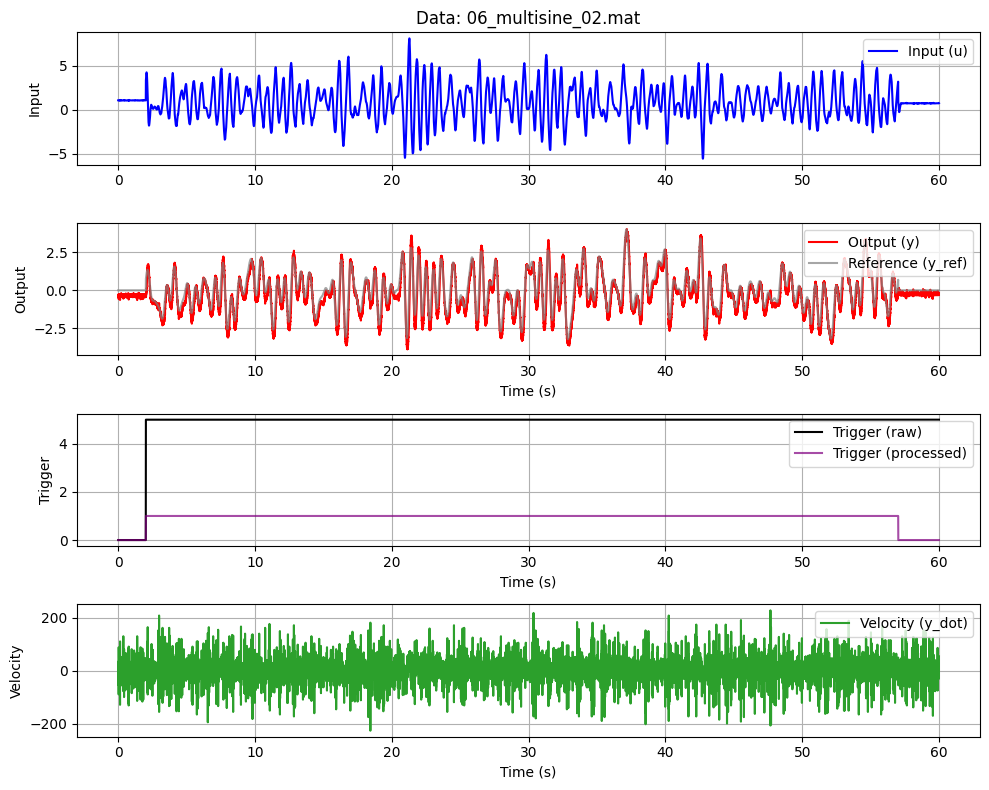

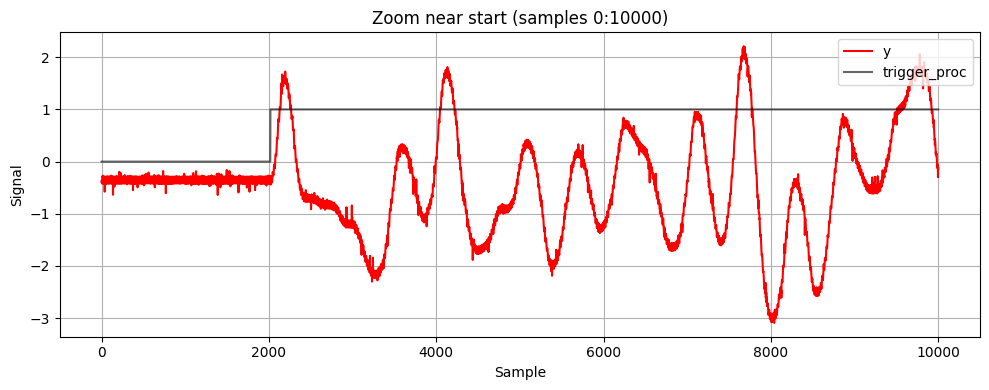

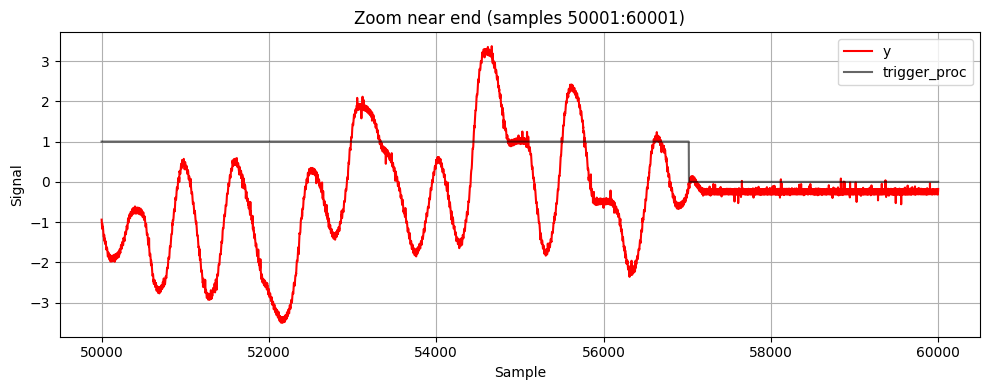

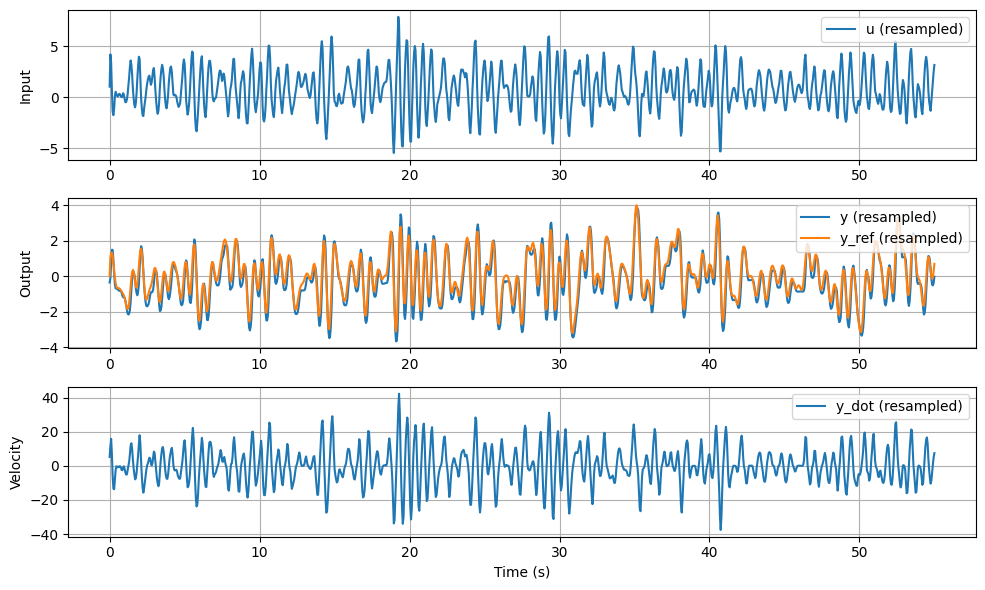

In [33]:

# Load and preprocess 'multisine_06'
data = nod.load_experiment('multisine_06', preprocess=True, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data


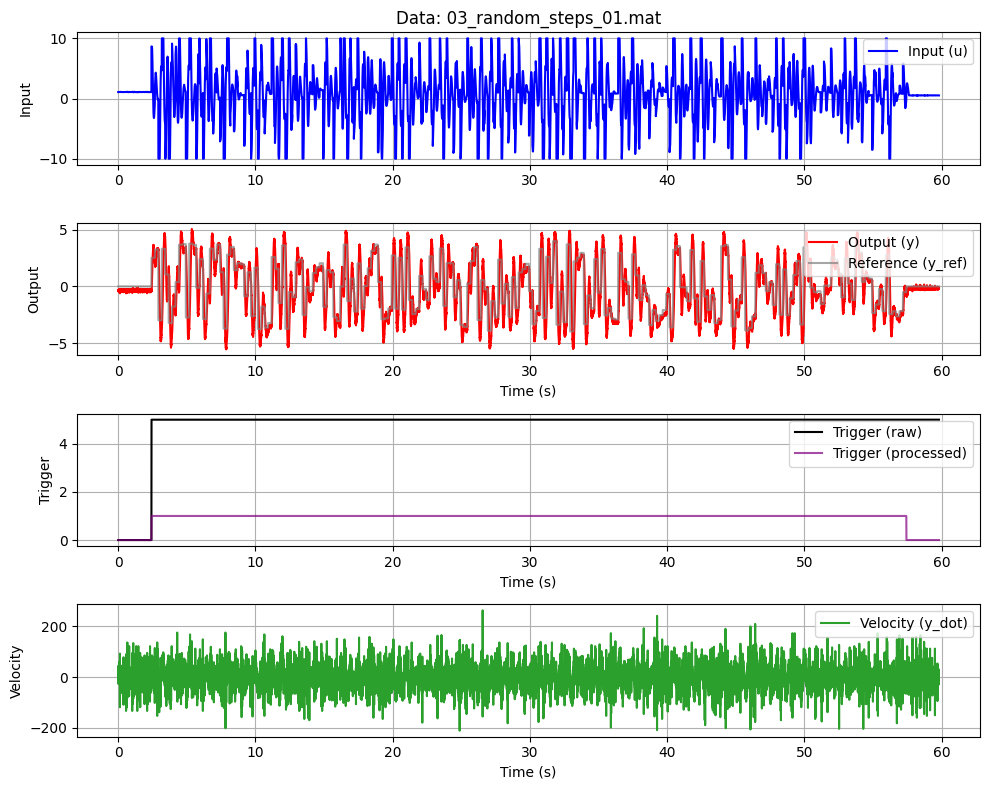

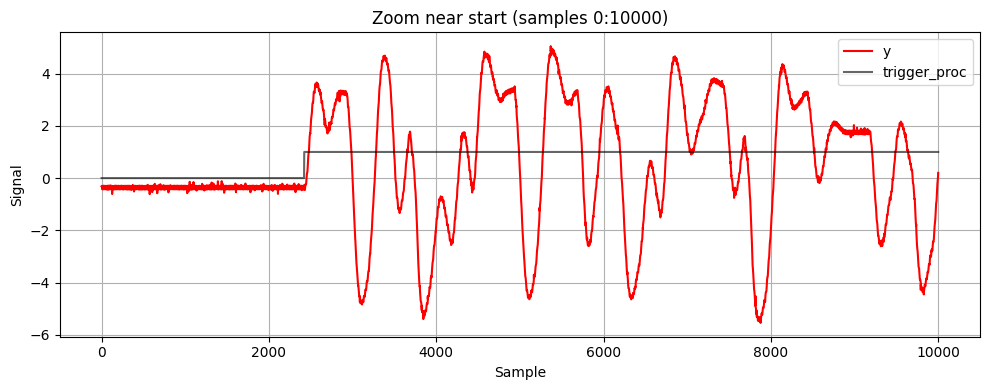

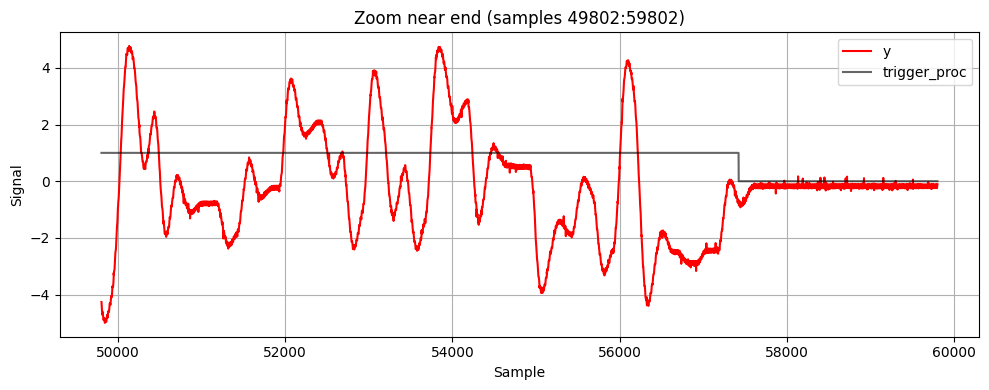

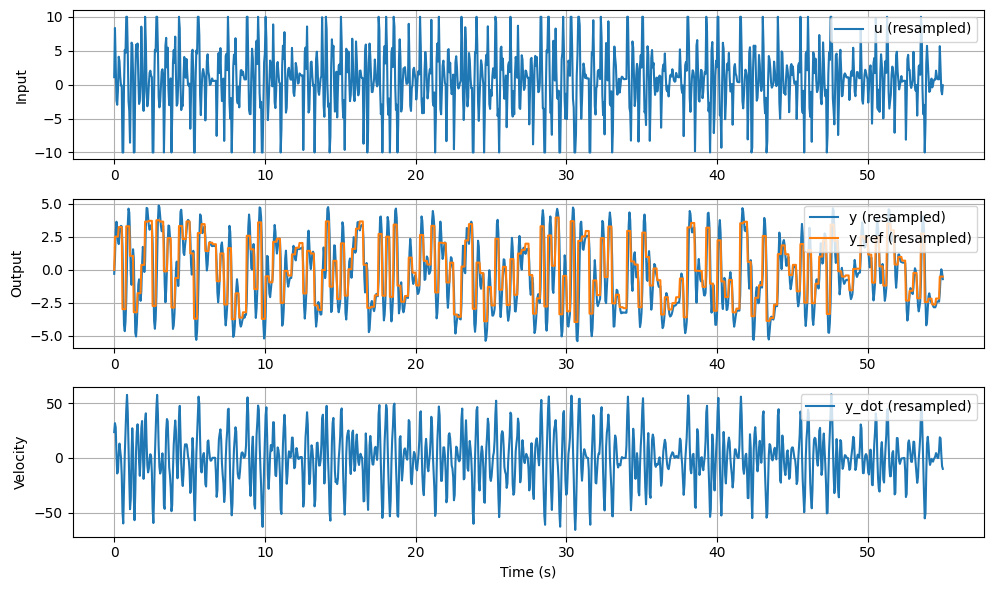

In [34]:

# Load and preprocess 'random_steps_01'
data = nod.load_experiment('random_steps_01', preprocess=True, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data


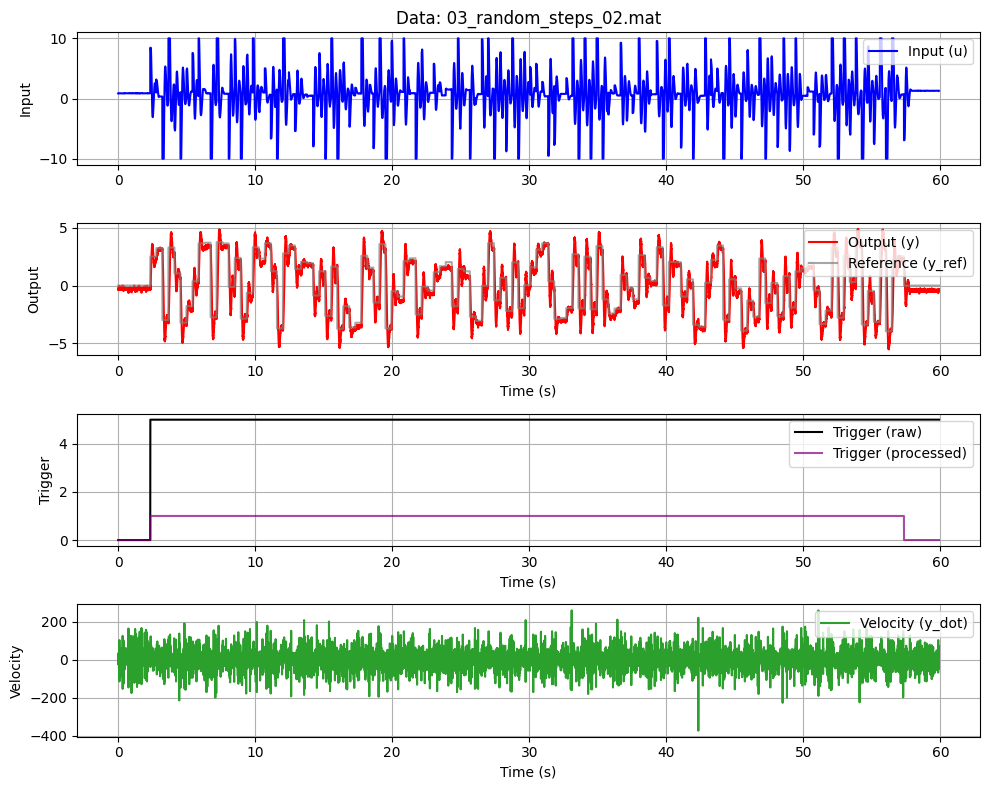

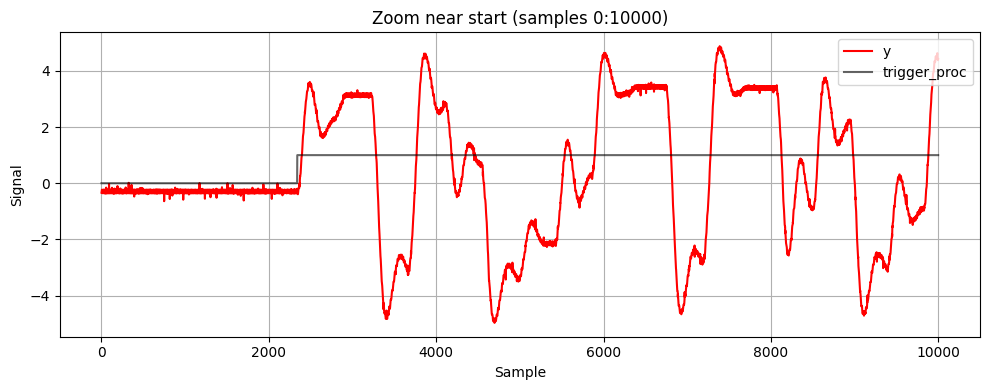

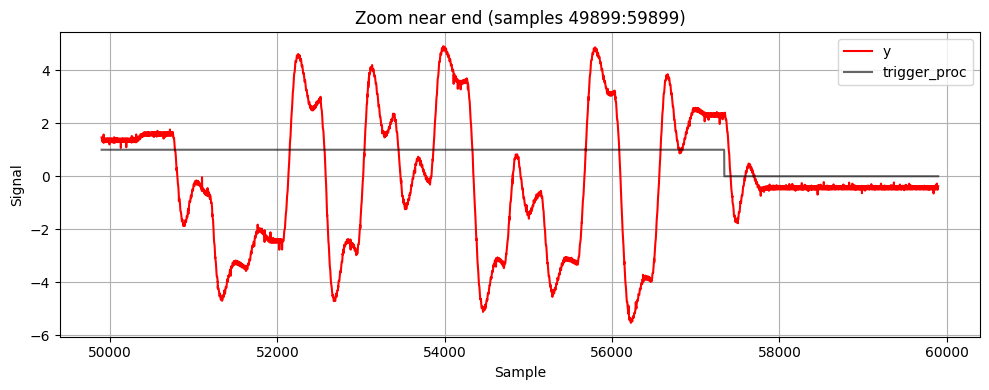

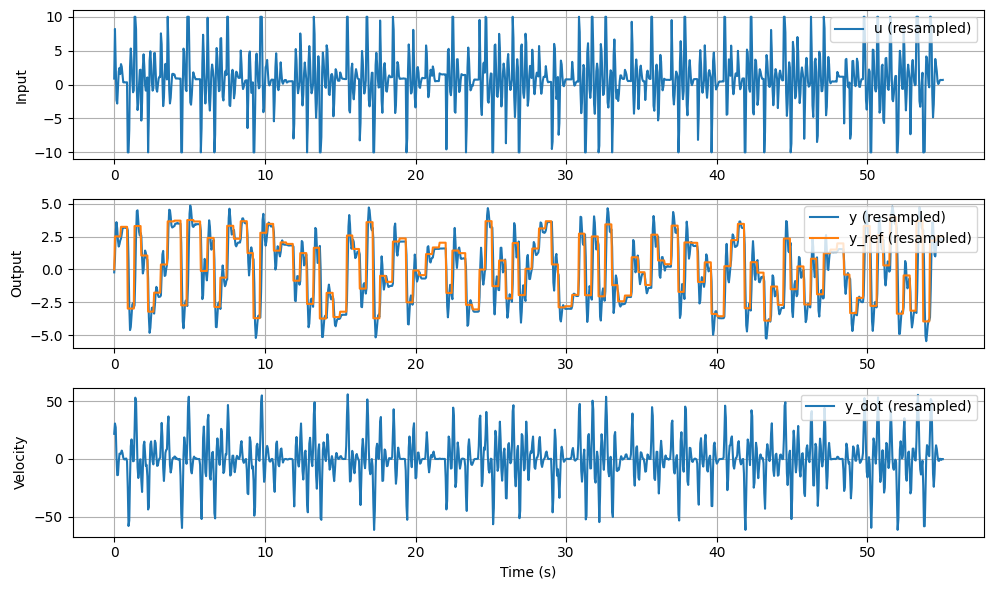

In [35]:

# Load and preprocess 'random_steps_02'
data = nod.load_experiment('random_steps_02', preprocess=True, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data


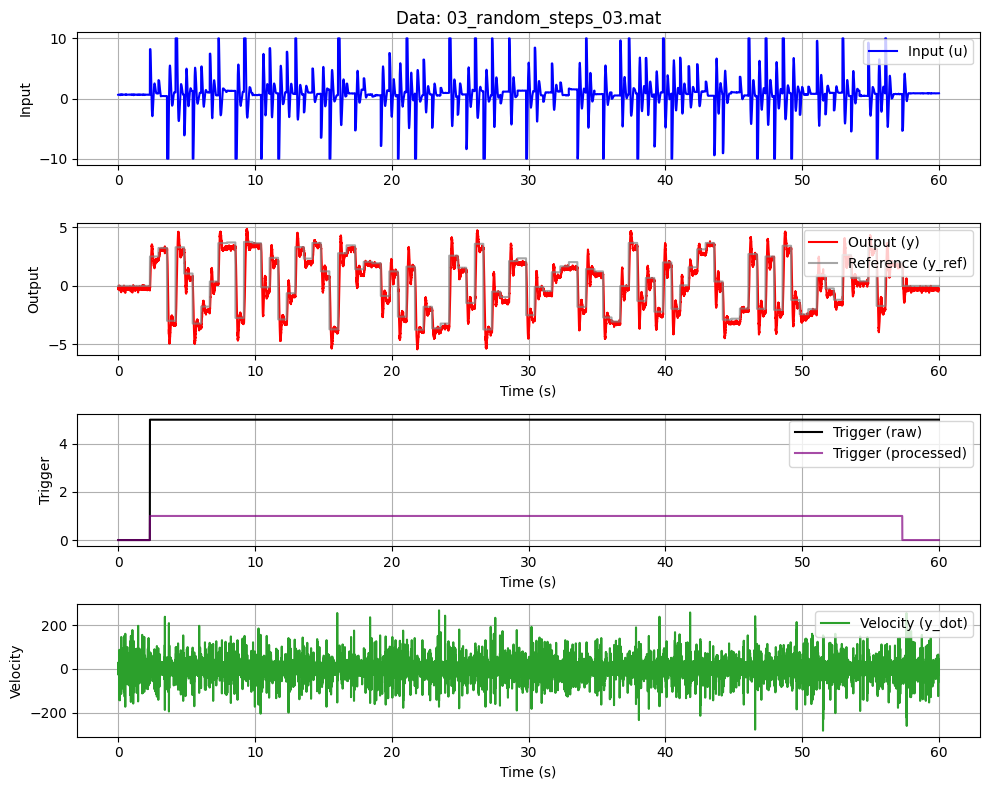

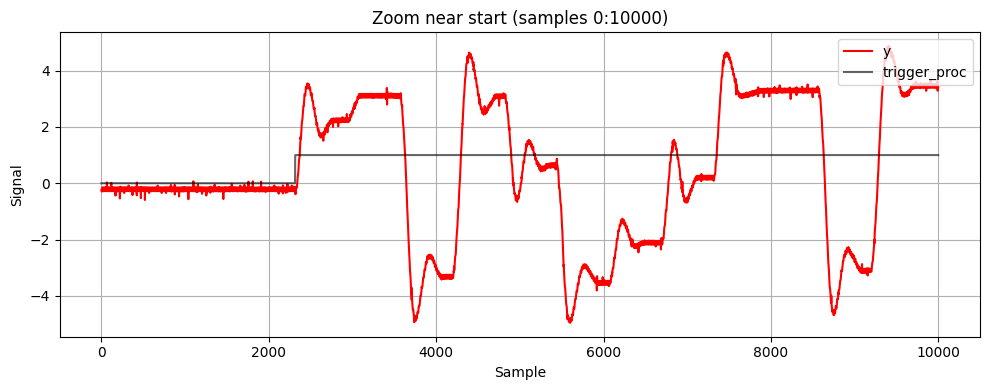

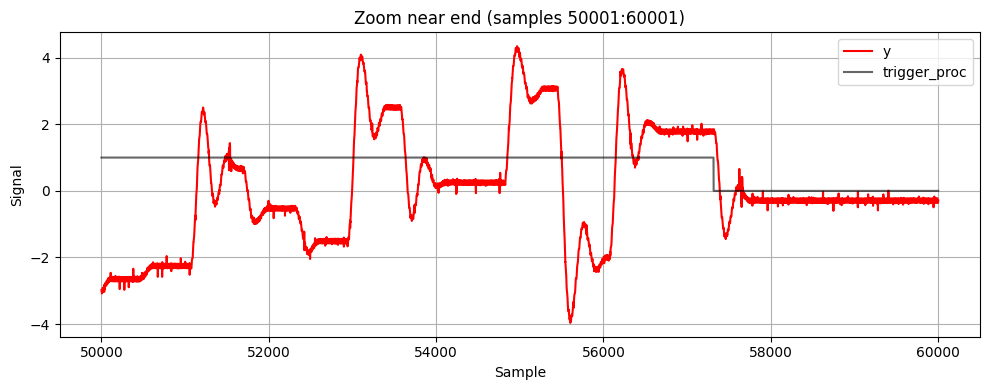

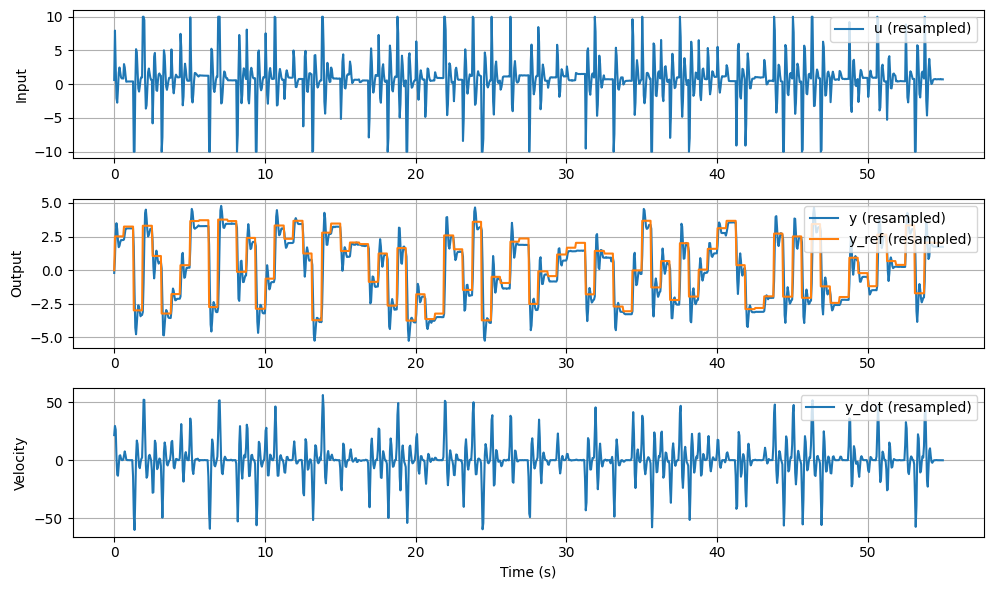

In [36]:

# Load and preprocess 'random_steps_03'
data = nod.load_experiment('random_steps_03', preprocess=True, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data


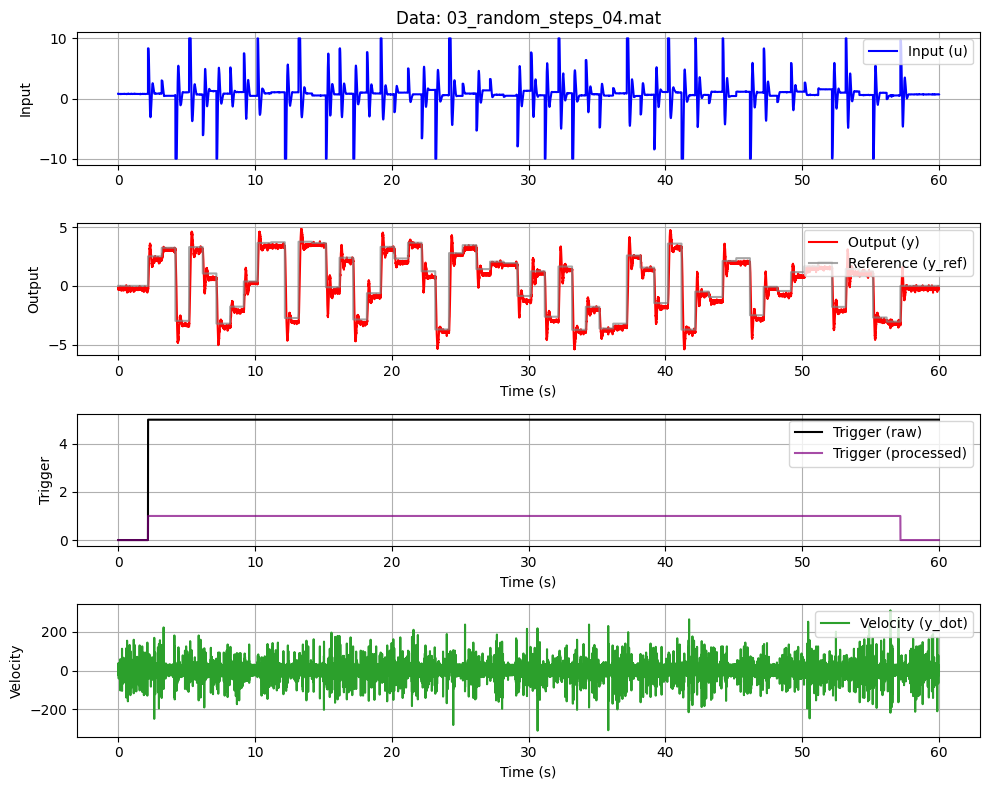

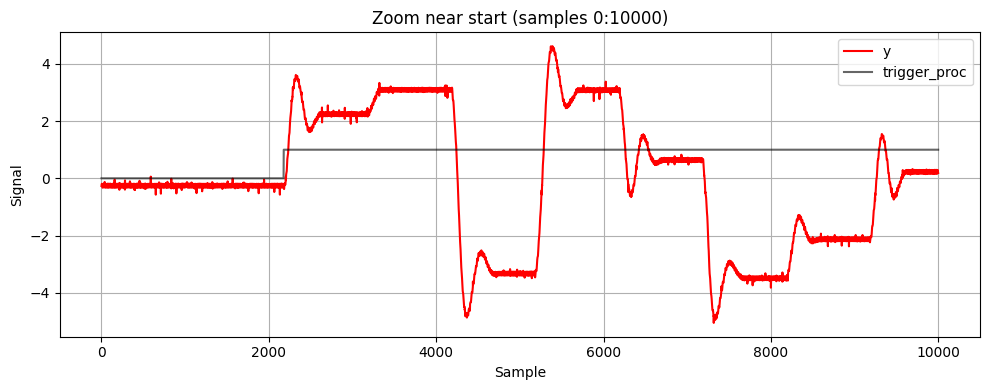

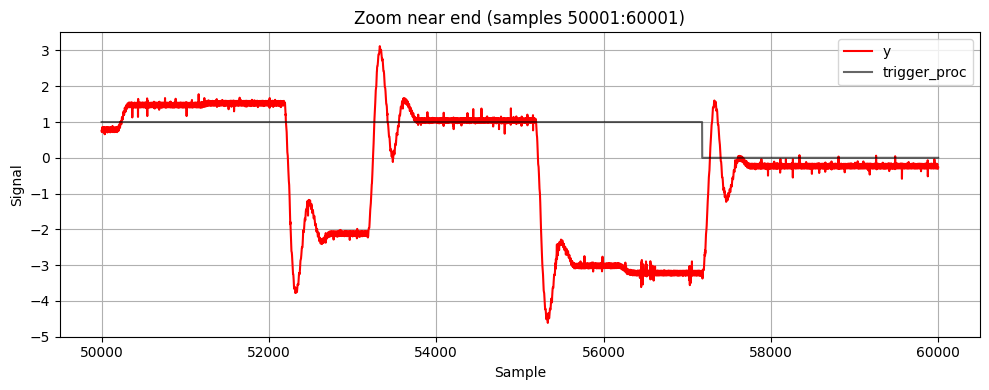

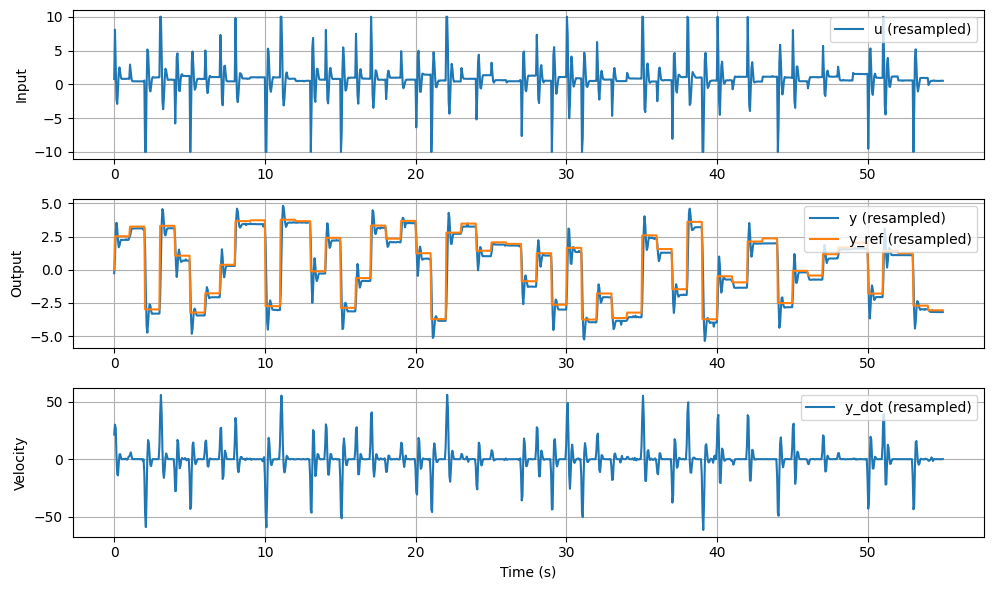

In [37]:

# Load and preprocess 'random_steps_04'
data = nod.load_experiment('random_steps_04', preprocess=True, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data


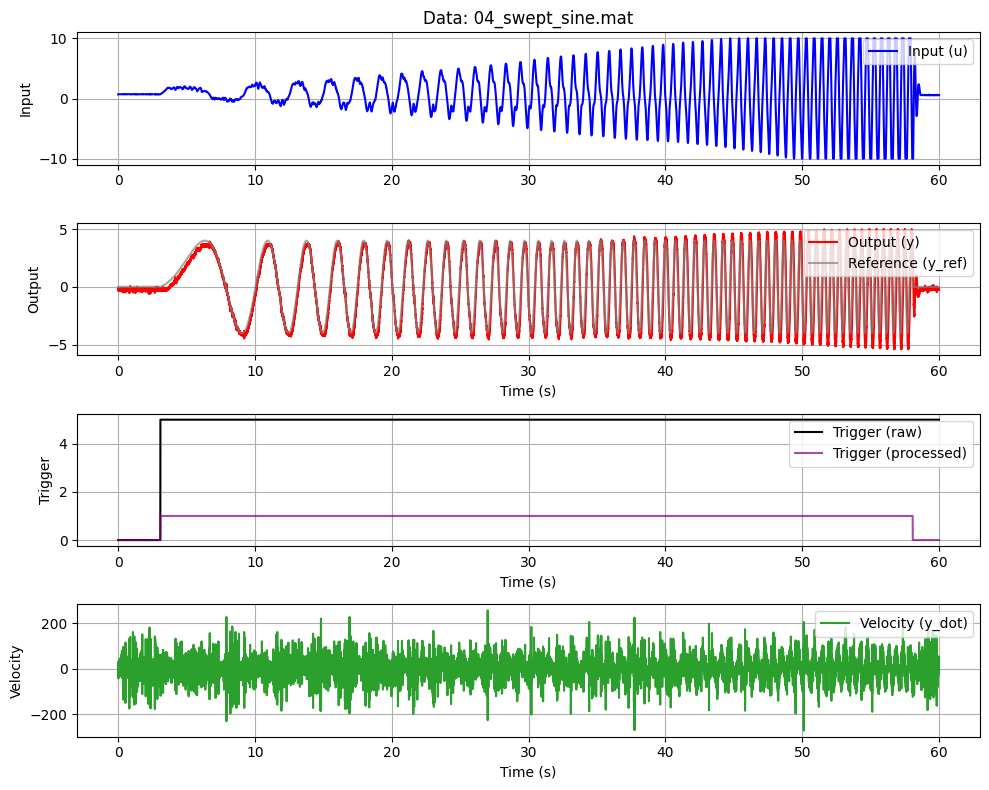

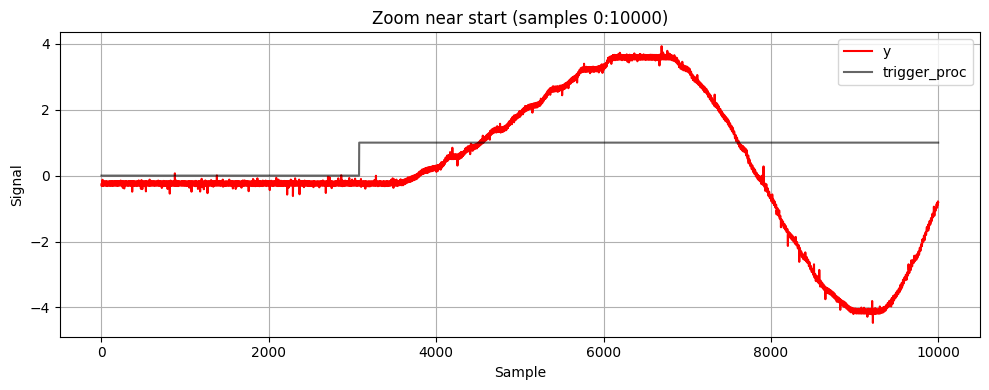

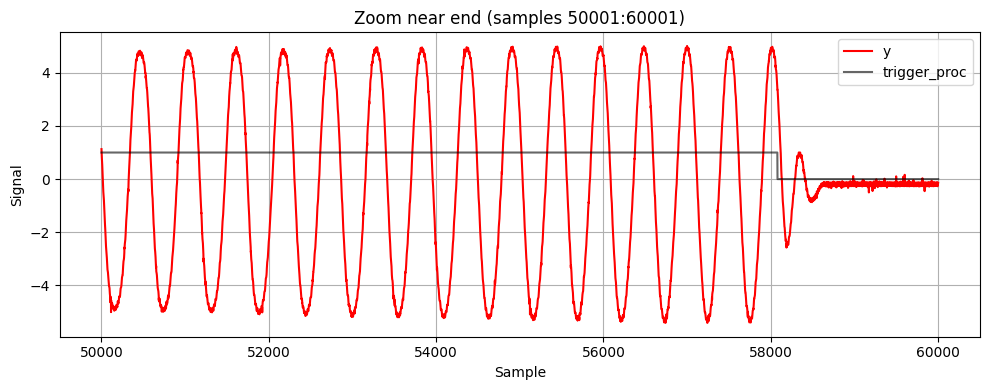

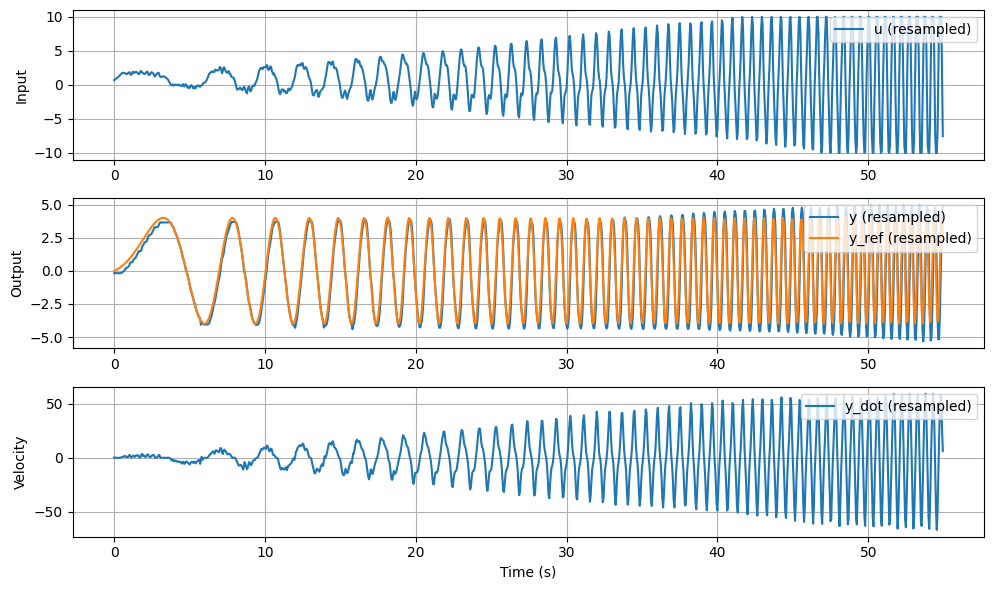

In [38]:

# Load and preprocess 'swept_sine'
data = nod.load_experiment('swept_sine', preprocess=True, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data


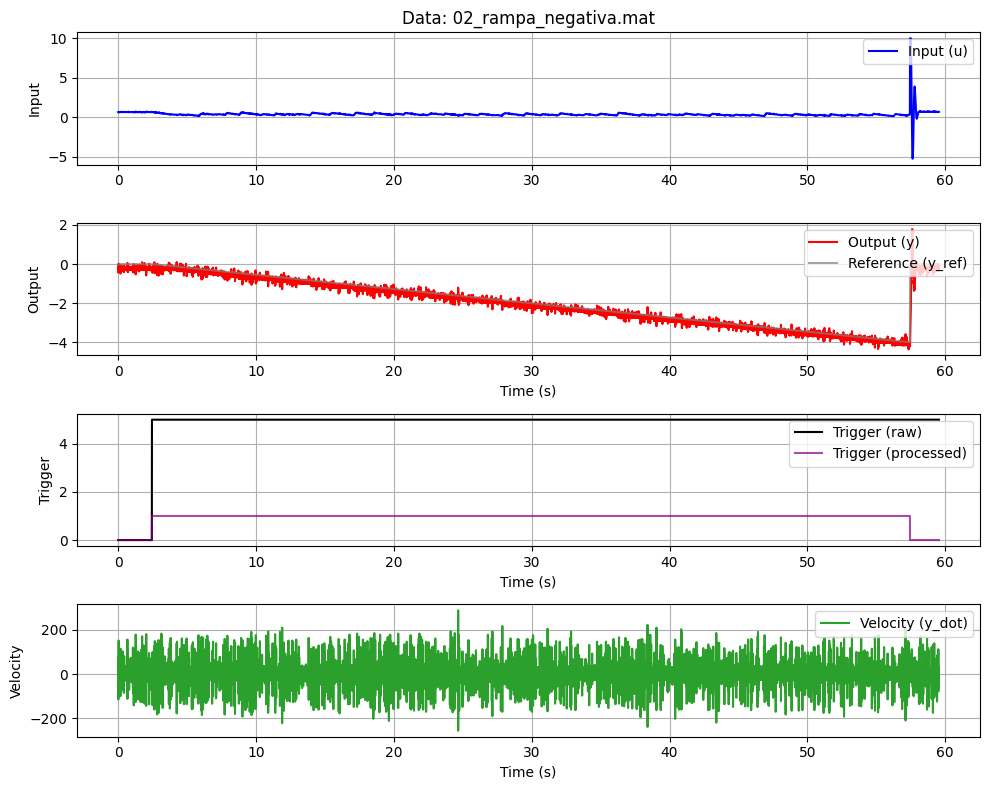

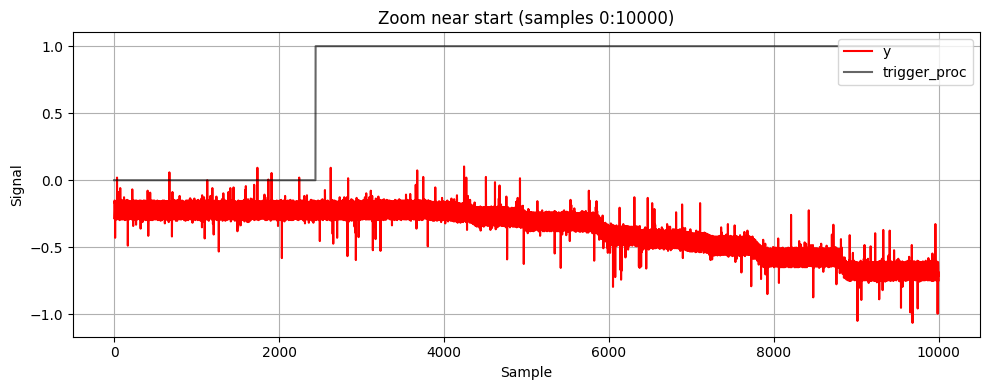

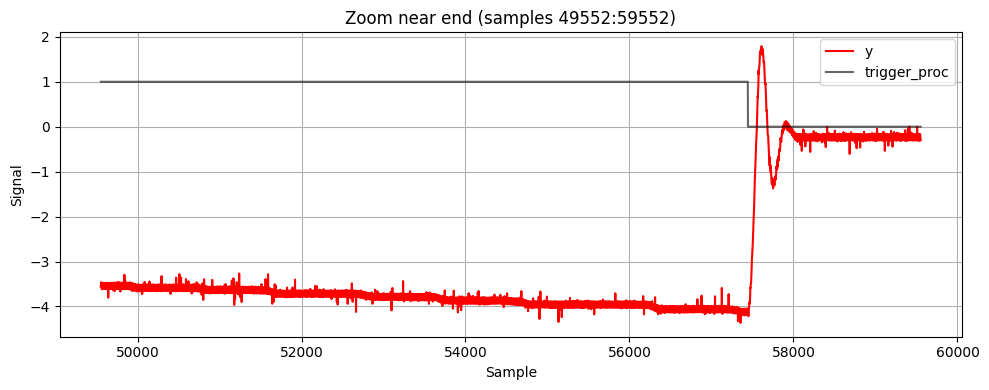

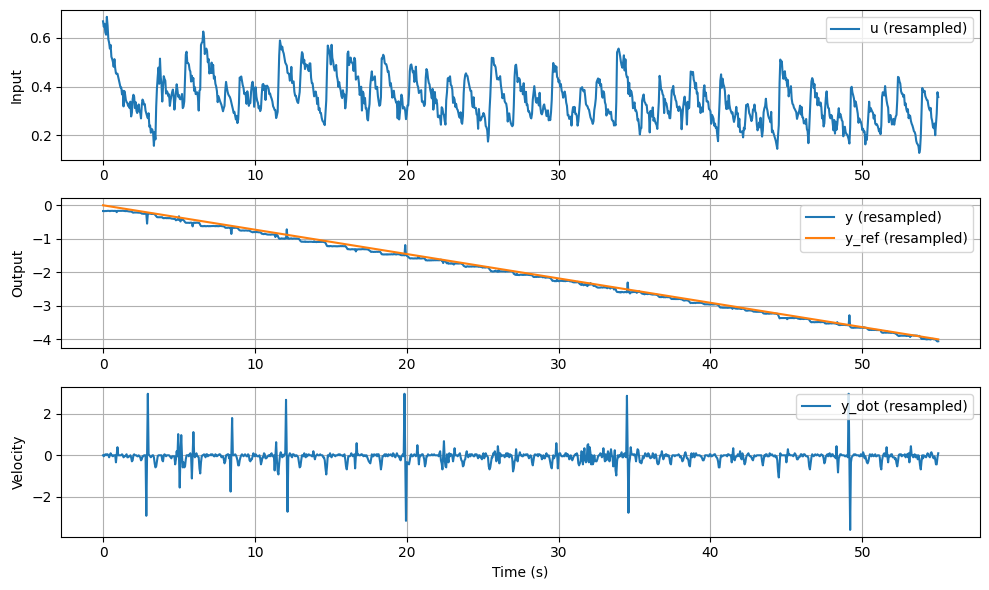

In [39]:

# Load and preprocess 'rampa_negativa'
data = nod.load_experiment('rampa_negativa', preprocess=True, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data


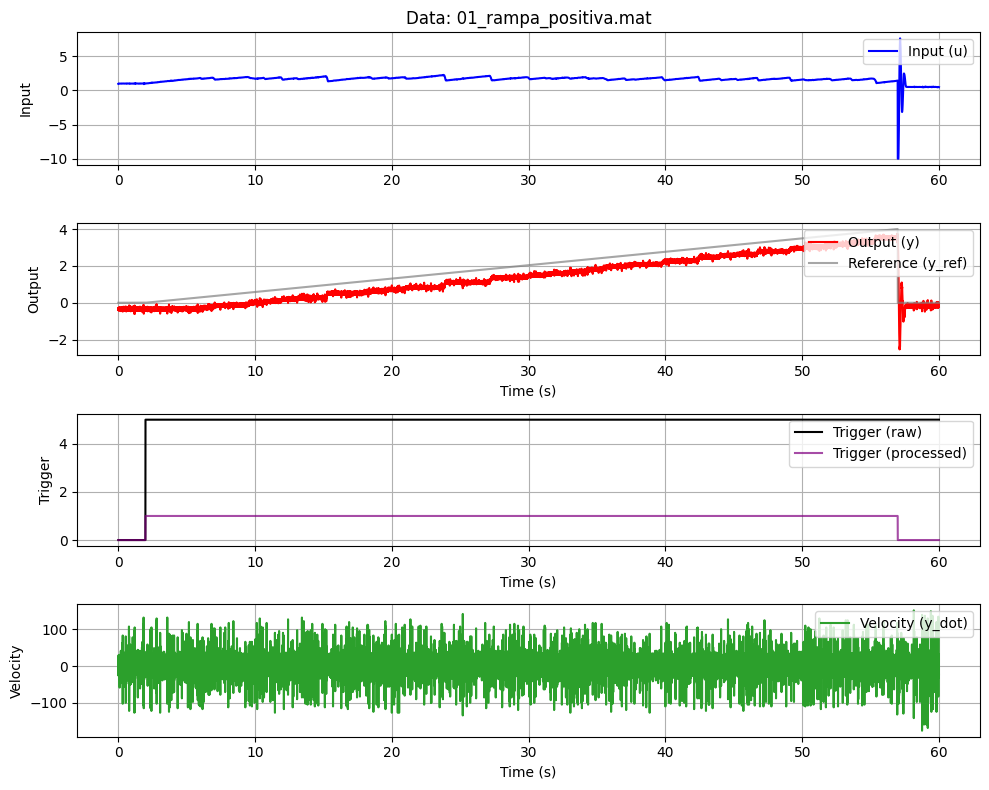

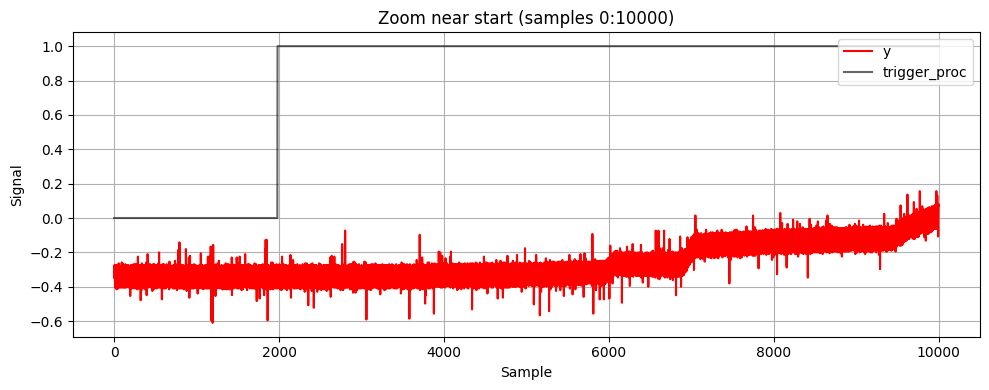

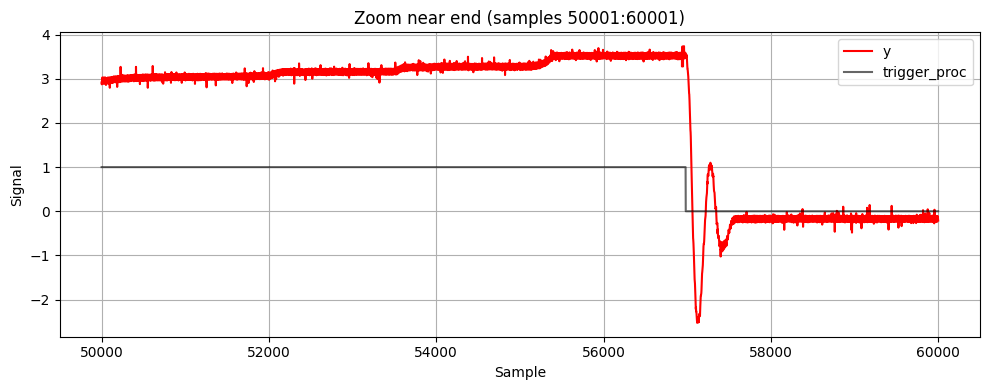

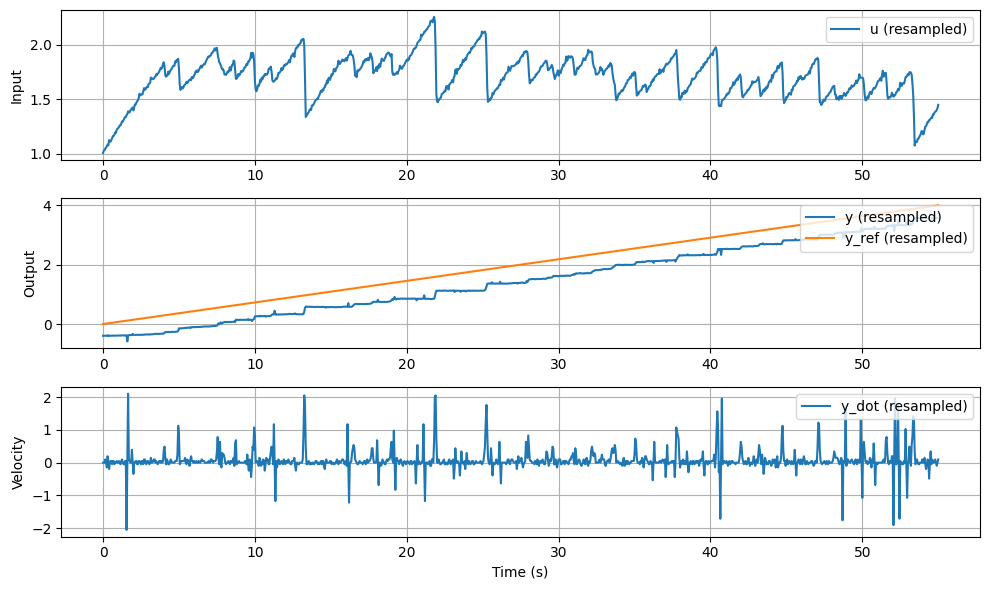

In [40]:

# Load and preprocess 'rampa_positiva'
data = nod.load_experiment('rampa_positiva', preprocess=True, plot=True, end_idx=None, resample_factor=50, zoom_last_n=10000, y_dot_method=velMethod)
u, y, y_ref, y_dot = data